In [1]:
from IPython.display import Audio


In [2]:
import sys
import glob
import importlib
sys.path.append('/home/jupyter/rfcx_submission/scripts')

In [3]:
from audiomentations import Compose, AddGaussianNoise, AddGaussianSNR , PitchShift , Gain
import numpy as np

In [4]:
import librosa
import librosa.display

In [5]:
import load_mel
from augment import do_aug

/opt/conda/lib/python3.7/site-packages/noisereduce/noisereduce.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [6]:
def show_audio(y,sr):
    librosa.display.waveplot(y, sr=sr)

    spec= load_mel.get_spectrogram(y,sr,apply_denoise=False,return_audio=False)
    load_mel.plot_feature(spec)
    
    return Audio(y,rate=sr)

In [7]:
import colorednoise as cn

class AudioTransform:
    def __init__(self, always_apply=False, p=0.5):
        self.always_apply = always_apply
        self.p = p

    def __call__(self, y: np.ndarray, sr: int):
        if self.always_apply:
            return self.apply(y)
        else:
            if np.random.rand() < self.p:
                return self.apply(y)
            else:
                return y

    def apply(self, y: np.ndarray):
        raise NotImplementedError
        
        
        
class PinkNoiseSNR(AudioTransform):
    def __init__(self, always_apply=False, p=0.5, min_snr=5.0, max_snr=20.0, **kwargs):
        super().__init__(always_apply, p)

        self.min_snr = min_snr
        self.max_snr = max_snr

    def apply(self, y: np.ndarray, **params):
        snr = np.random.uniform(self.min_snr, self.max_snr)
        a_signal = np.sqrt(y ** 2).max()
        a_noise = a_signal / (10 ** (snr / 20))

        pink_noise = cn.powerlaw_psd_gaussian(1, len(y))
        a_pink = np.sqrt(pink_noise ** 2).max()
        augmented = (y + pink_noise * 1 / a_pink * a_noise).astype(y.dtype)
        return augmented

In [8]:
audio_files= glob.glob('/home/jupyter/rfcx/data/*/*.flac')
# audio_files= glob.glob('/home/jupyter/librispeech/LibriSpeech/test-other/1688/142285/*.flac')
len(audio_files)


6719

In [9]:
input_file= audio_files[-10]
input_file

'/home/jupyter/rfcx/data/test/c5cff3f95.flac'

In [10]:
SAMPLE_RATE = 32000


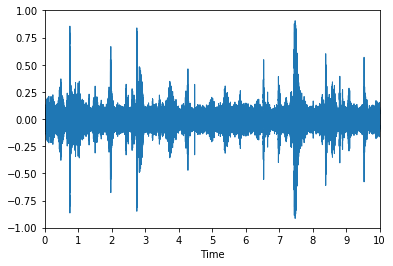

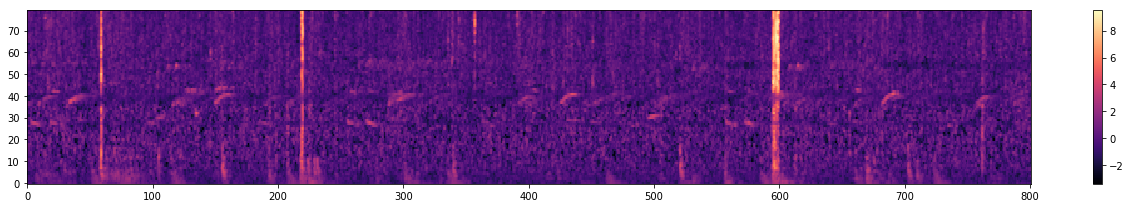

In [11]:
y, sr = librosa.load(input_file, sr=SAMPLE_RATE, duration=10)
show_audio(y,sr)

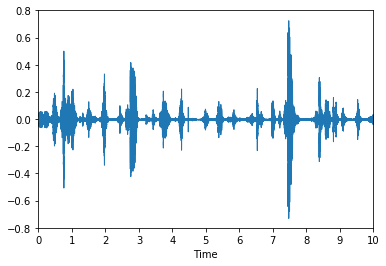

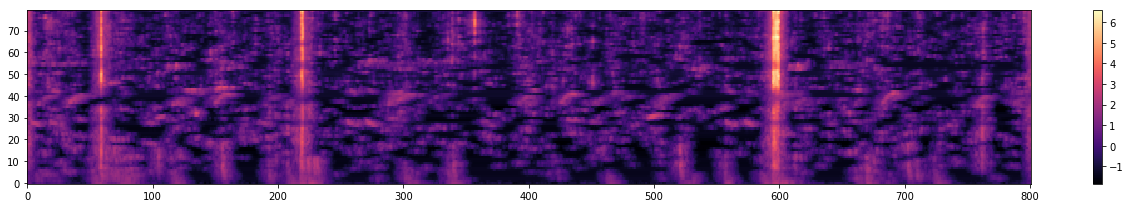

In [12]:
y_deniosed= load_mel.denoise(y, sr)
show_audio(y_deniosed,sr)

In [20]:

augment = Compose([PitchShift(min_semitones=-4, max_semitones=4, p=0.5),
                   Gain(min_gain_in_db=-12, max_gain_in_db=12, p=0.5),
#                    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),
#                    AddGaussianSNR(min_SNR=0.1, max_SNR=1, p=1),
#                    PinkNoiseSNR(min_snr=5.0, max_snr=20.0, p=0.5)
                   ])

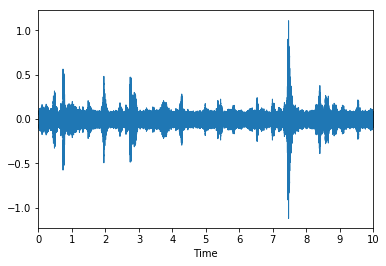

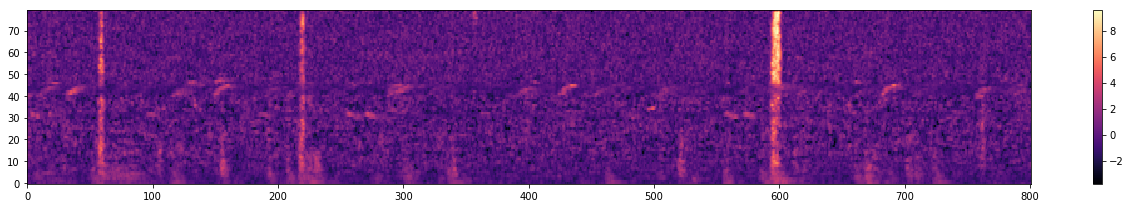

In [17]:
y_aug = augment(samples=y, sample_rate=SAMPLE_RATE)

show_audio(y_aug, SAMPLE_RATE)

In [ ]:
y_aug_deniosed = augment(samples=y_deniosed, sample_rate=SAMPLE_RATE)

show_audio(y_aug_deniosed, SAMPLE_RATE)

In [ ]:
y,sr= load_mel.load_audio(input_file, SAMPLE_RATE)
show_audio(y, SAMPLE_RATE)

In [ ]:
y_deniosed= load_mel.denoise(y, sr)
show_audio(y_deniosed,sr)

In [ ]:
y_aug = do_aug(samples=y, sample_rate=SAMPLE_RATE)

show_audio(y_aug, SAMPLE_RATE)

In [ ]:
y_aug2 = do_aug(samples=y_deniosed, sample_rate=SAMPLE_RATE)

show_audio(y_aug2, SAMPLE_RATE)